In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



In [2]:
# 1. MNIST betöltése
transform = transforms.Compose([transforms.ToTensor()])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.76MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 242kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.03MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.72MB/s]


In [3]:
# 2. CNN definíció
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=5)  # 1 csatornáról 4 feature map
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3)  # 4 → 8
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)

    def forward(self, x):
        out1 = self.conv1(x)
        out2 = self.relu1(out1)
        out3 = self.pool1(out2)
        out4 = self.conv2(out3)
        out5 = self.relu2(out4)
        out6 = self.pool2(out5)
        return [x, out1, out2, out3, out4, out5, out6]

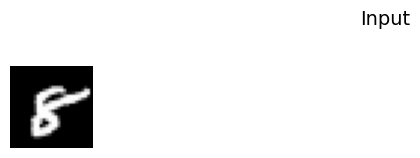

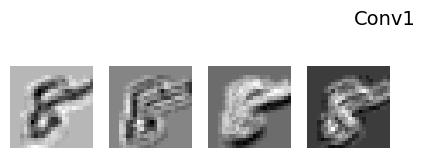

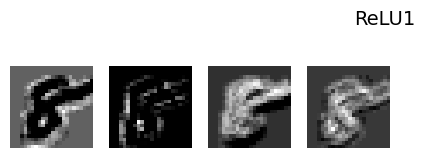

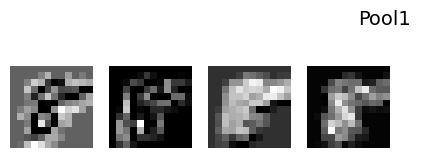

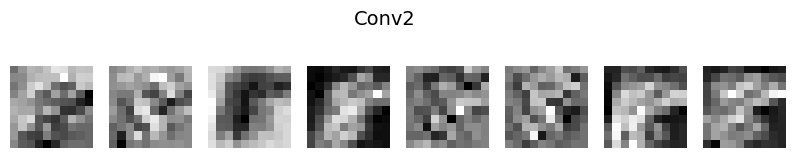

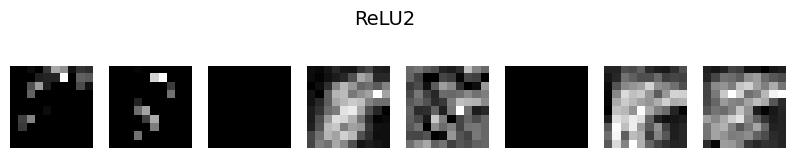

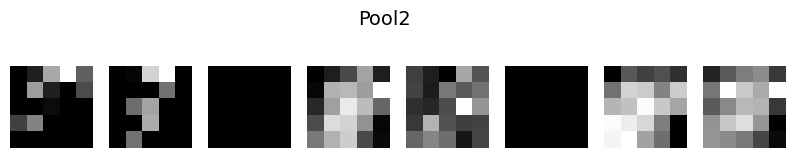

In [5]:
model = SimpleCNN()

# 3. Egy véletlenszerű kép kinyerése
images, labels = next(iter(test_loader))
with torch.no_grad():
    outputs = model(images)

# 4. Feature map-ek vizualizálása
layer_names = ["Input", "Conv1", "ReLU1", "Pool1", "Conv2", "ReLU2", "Pool2"]

for i, feature_map in enumerate(outputs):
    plt.figure(figsize=(10, 2))
    plt.suptitle(layer_names[i], fontsize=14)
    feature_map = feature_map.squeeze(0)  # Remove batch dim

    for j in range(min(feature_map.shape[0], 8)):  # max 8 feature map-et mutatunk
        plt.subplot(1, 8, j+1)
        plt.imshow(feature_map[j].cpu().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()